In [5]:
#1.2.1 One-Hot Represetation
strings_1= "Time flies like an arrow."
strings_2 = "Fruit flies like a banana."
strings_1 = strings_1.lower().split()
strings_2 = strings_2.lower().split()

strings_1[-1] = strings_1[-1][:-1]
strings_2[-1] = strings_2[-1][:-1]

print(strings_1)
print(strings_2)

['time', 'flies', 'like', 'an', 'arrow']
['fruit', 'flies', 'like', 'a', 'banana']


In [11]:
#using set representation
str_vocab = list(set(strings_1 + strings_2))

#make one hot representation
word_to_id = {word : id  for id, word in enumerate(str_vocab)}
print(word_to_id)

{'time': 0, 'like': 1, 'fruit': 2, 'an': 3, 'arrow': 4, 'flies': 5, 'a': 6, 'banana': 7}


In [12]:
def get_one_hot(word_to_id, word):
  one_hot_vector = [0] * (len(word_to_id))
  one_hot_vector[word_to_id[word]] = 1
  return one_hot_vector

In [15]:
for word, id in word_to_id.items():
  print("%10s : " % word, end= " ")
  print(get_one_hot(word_to_id, word))

      time :  [1, 0, 0, 0, 0, 0, 0, 0]
      like :  [0, 1, 0, 0, 0, 0, 0, 0]
     fruit :  [0, 0, 1, 0, 0, 0, 0, 0]
        an :  [0, 0, 0, 1, 0, 0, 0, 0]
     arrow :  [0, 0, 0, 0, 1, 0, 0, 0]
     flies :  [0, 0, 0, 0, 0, 1, 0, 0]
         a :  [0, 0, 0, 0, 0, 0, 1, 0]
    banana :  [0, 0, 0, 0, 0, 0, 0, 1]


In [17]:
#1.2.2 TF-IDF representation (using basic python)

sentence = "Fruit flies like time flies a fruit"
sentence = sentence.lower().split()

TF_Representation = [0] * len(word_to_id)

for i, word in enumerate(sentence):
  TF_Representation[word_to_id[word]] += 1

print(word_to_id)
print(TF_Representation)

{'time': 0, 'like': 1, 'fruit': 2, 'an': 3, 'arrow': 4, 'flies': 5, 'a': 6, 'banana': 7}
[1, 1, 2, 0, 0, 2, 1, 0]


<Axes: >

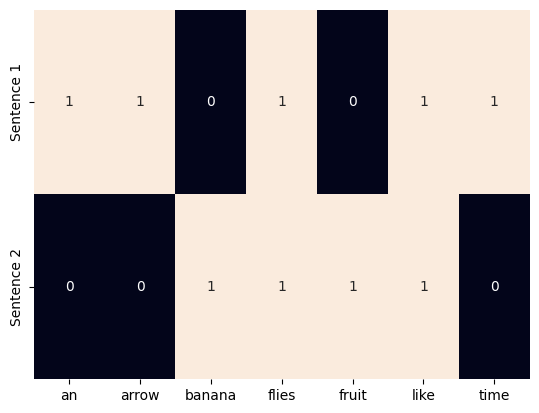

In [23]:
#1.2.2 TF Representation (using sklearn)
# 단순 원핫 벡터의 합 -> TF-Representation
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ["Time flies like an arrow.",
          "Fruit flies like a banana."]

one_hot_vectorizer = CountVectorizer(binary = True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
# get_feature_names() --> get_feature_names_out()
vocab = one_hot_vectorizer.get_feature_names_out()
sns.heatmap(one_hot, annot=True, cbar = False, xticklabels=vocab, yticklabels=["Sentence 1", "Sentence 2"])

<Axes: >

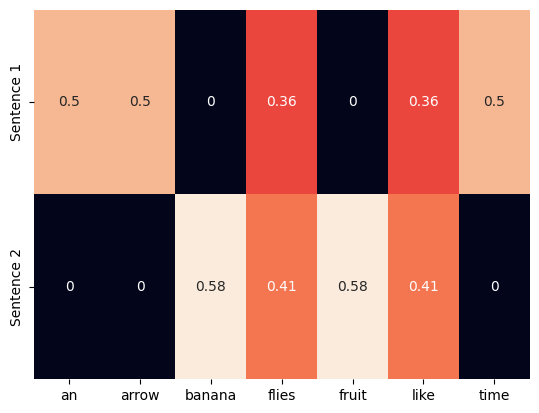

In [26]:
# 1.2.3 TF-IDF Representation (Term-Frequency-Inverse-Document-Frequency)

from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels = vocab,
            yticklabels = ["Sentence 1", "Sentence 2"])


$$IDF(w)=log(\frac{N}{n_w})$$  <br/>

$n_w$ 는 단어$w$를 포함한 전체 문서의 개수, $N$는 전체 문서의 개수임.
<br/><br/>

$$TF-IDF(w) = TF(w) * IDF(w)$$  <br/><br/>

sklearn의 IDF산출 공식은 약간 다름. <br/>

$$IDF(w)=log(\frac{N + 1}{N_w + 1}) + 1$$ <br/>
이후 L2-Norm 정규화를 수행함.

$$L2-Norm(x_k) = \frac{x_k}{\sqrt{\sum_{i=1}^{n}{x_i^2} } },$$
$x_k$ is TF-IDF value of the "k"th word in vocabulary.